# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "CF"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = vaep.nb.get_params(args, globals=globals())
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'CF',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_CF'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.497  1  0.825 0.365 0.004   
                             age        0.088  1  0.146 0.703 0.001   
                             Kiel       2.151  1  3.569 0.060 0.018   
                             Magdeburg  5.039  1  8.357 0.004 0.042   
                             Sweden     7.976  1 13.230 0.000 0.065   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.284  1  0.290 0.591 0.002   
                             age        0.727  1  0.742 0.390 0.004   
                             Kiel       0.195  1  0.199 0.656 0.001   
                             Magdeburg  2.296  1  2.343 0.128 0.012   
                             Sweden    15.832  1 16.152 0.000 0.078   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.438  0.526    False  
                             age               0.153  0.810    False  
                             Kiel              1.219  0.141    False  
                             Magdeburg         2.368  0.017     True  
                             Sweden            3.451  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.228  0.723    False  
                             age               0.409  0.551    False  
                             Kiel              0.183  0.774    False  
                             Magdeburg         0.894  0.252    False  
                             Sweden            4.076  0.001     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                      CF                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         1.126  1  7.946 0.005 0.040   
                             age        0.011  1  0.074 0.785 0.000   
                             Kiel       0.317  1  2.235 0.137 0.012   
                             Magdeburg  0.504  1  3.557 0.061 0.018   
                             Sweden     1.716  1 12.111 0.001 0.060   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.913  1  4.010 0.047 0.021   
                             age        0.938  1  1.967 0.162 0.010   
                             Kiel       2.402  1  5.038 0.026 0.026   
                             Magdeburg  1.895  1  3.973 0.048 0.020   
                             Sweden    16.547  1 34.697 0.000 0.154   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.273  0.016     True  
                             age               0.105  0.857    False  
                             Kiel              0.865  0.233    False  
                             Magdeburg         1.216  0.123    False  
                             Sweden            3.207  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.331  0.099    False  
                             age               0.790  0.267    False  
                             Kiel              1.586  0.060    False  
                             Magdeburg         1.322  0.100    False  
                             Sweden            7.767  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     CF                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.005         2.273  0.016     True   
                             age       0.785         0.105  0.857    False   
                             Kiel      0.137         0.865  0.233    False   
                             Magdeburg 0.061         1.216  0.123    False   
                             Sweden    0.001         3.207  0.002     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.047         1.331  0.099    False   
                             age       0.162         0.790  0.267    False   
                             Kiel      0.026         1.586  0.060    False   
                             Magdeburg 0.048         1.322  0.100    False   
                             Sweden    0.000         7.767  0.000     True   

model                                     PI                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.365         0.438  0.526    False  
                             age       0.703         0.153  0.810    False  
                             Kiel      0.060         1.219  0.141    False  
                             Magdeburg 0.004         2.368  0.017     True  
                             Sweden    0.000         3.451  0.002     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.591         0.228  0.723    False  
                             age       0.390         0.409  0.551    False  
                             Kiel      0.656         0.183  0.774    False  
                             Magdeburg 0.128         0.894  0.252    False  
                             Sweden    0.000         4.076  0.001     True  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'CF': 'CF', 'PI': 'PI'}

## Describe scores

In [10]:
scores.describe()

model        CF                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.227         3.275     0.281     0.260         2.475     0.336
std       0.295         6.216     0.322     0.302         5.304     0.329
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.001         0.402     0.002     0.004         0.339     0.015
50%       0.064         1.194     0.128     0.121         0.918     0.241
75%       0.396         3.273     0.528     0.458         2.412     0.611
max       1.000        86.518     1.000     1.000       147.735     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        CF                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.005         2.273   
A0A024R0T9;K7ER74;P02655                           AD     0.037         1.429   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.567         0.246   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.252         0.599   
A0A075B6H7                                         AD     0.008         2.111   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.242         0.617   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.538         0.269   
S4R3U6                                             AD     0.047         1.331   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.016     True   
A0A024R0T9;K7ER74;P02655                           AD      0.082    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.683    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.376    False   
A0A075B6H7                                         AD      0.022     True   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.284    False   
Q9Y6X5                                             AD      0.365    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.158    False   
Q9Y6Y9                                             AD      0.658    False   
S4R3U6                                             AD      0.099    False   

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.365         0.438   
A0A024R0T9;K7ER74;P02655                           AD     0.062         1.208   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.091         1.042   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.421         0.375   
A0A075B6H7                                         AD     0.190         0.721   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.030         1.524   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.780         0.108   
S4R3U6                                             AD     0.591         0.228   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.526    False  
A0A024R0T9;K7ER74;P02655                           AD      0.144    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.193    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.580    False  
A0A075B6H7                                         AD      0.334    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        CF                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.236         1.629     0.296     0.247         1.412     0.329
std       0.291         1.904     0.315     0.287         1.614     0.313
min       0.000         0.005     0.000     0.000         0.002     0.000
25%       0.006         0.385     0.017     0.012         0.372     0.038
50%       0.086         1.063     0.163     0.116         0.936     0.234
75%       0.412         2.229     0.544     0.424         1.939     0.583
max       0.989        25.112     0.993     0.997        19.865     0.997

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,CF,PI
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,939,1032


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

CF                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.005         2.273  0.016   
A0A024R0T9;K7ER74;P02655                           0.037         1.429  0.082   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.567         0.246  0.683   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.252         0.599  0.376   
A0A075B6H7                                         0.008         2.111  0.022   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.284   
Q9Y6X5                                             0.242         0.617  0.365   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.158   
Q9Y6Y9                                             0.538         0.269  0.658   
S4R3U6                                             0.047         1.331  0.099   

                                                               PI  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                           True 0.365   
A0A024R0T9;K7ER74;P02655                              False 0.062   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.091   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.421   
A0A075B6H7                                             True 0.190   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.030   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.780   
S4R3U6                                                False 0.591   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               0.438  0.526   
A0A024R0T9;K7ER74;P02655                                   1.208  0.144   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         1.042  0.193   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.375  0.580   
A0A075B6H7                                                 0.721  0.334   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.315   
Q9Y6X5                                                     1.524  0.082   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.182   
Q9Y6Y9                                                     0.108  0.864   
S4R3U6                                                     0.228  0.723   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
CF (no)  - PI (no)    888
CF (yes) - PI (yes)   338
CF (yes) - PI (no)    144
CF (no)  - PI (yes)    51
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


CF                                  PI  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A024QZX5;A0A087X1N8;P35237 0.005         2.273  0.016     True 0.365   
A0A075B6H7                   0.008         2.111  0.022     True 0.190   
A0A075B6I0                   0.001         3.106  0.003     True 0.026   
A0A075B6R2                   0.001         2.919  0.004     True 0.447   
A0A075B6S5                   0.014         1.865  0.035     True 0.174   
...                            ...           ...    ...      ...   ...   
Q9P0K9                       0.014         1.848  0.036     True 0.046   
Q9ULZ9                       0.030         1.519  0.069    False 0.003   
Q9UNW1                       0.733         0.135  0.816    False 0.007   
Q9UP79                       0.000         3.885  0.001     True 0.274   
Q9UQ52                       0.001         3.013  0.004     True 0.100   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         0.438  0.526    False       186  
A0A075B6H7                           0.721  0.334    False        91  
A0A075B6I0                           1.584  0.074    False       194  
A0A075B6R2                           0.350  0.602    False       164  
A0A075B6S5                           0.760  0.313    False       129  
...                                    ...    ...      ...       ...  
Q9P0K9                               1.338  0.114    False       192  
Q9ULZ9                               2.592  0.011     True       171  
Q9UNW1                               2.184  0.024     True       171  
Q9UP79                               0.563  0.435    False       135  
Q9UQ52                               1.000  0.209    False       188  

[195 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,CF,PI,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.016,0.526,186,CF (yes) - PI (no)
A0A024R0T9;K7ER74;P02655,0.082,0.144,195,CF (no) - PI (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.683,0.193,174,CF (no) - PI (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.376,0.580,196,CF (no) - PI (no)
A0A075B6H7,0.022,0.334,91,CF (yes) - PI (no)
...,...,...,...,...
Q9Y6R7,0.284,0.315,197,CF (no) - PI (no)
Q9Y6X5,0.365,0.082,173,CF (no) - PI (no)
Q9Y6Y8;Q9Y6Y8-2,0.158,0.182,197,CF (no) - PI (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,CF,PI,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
P17931,0.011,0.973,174,CF (yes) - PI (no),0.962
O60565,0.002,0.948,81,CF (yes) - PI (no),0.947
A0A0C4DH29,0.009,0.950,49,CF (yes) - PI (no),0.941
P52758,0.938,0.001,119,CF (no) - PI (yes),0.937
O00187;O00187-2,0.038,0.961,119,CF (yes) - PI (no),0.923
...,...,...,...,...,...
P00740;P00740-2,0.043,0.053,197,CF (yes) - PI (no),0.010
K7ERG9;P00746,0.042,0.052,197,CF (yes) - PI (no),0.010
P09211,0.045,0.055,169,CF (yes) - PI (no),0.010


### Differences plotted with created annotations

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_comparision_1_CF


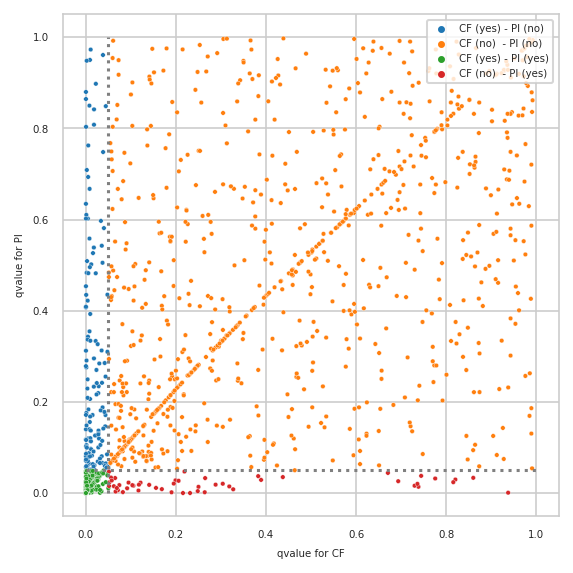

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_comparision_2_CF


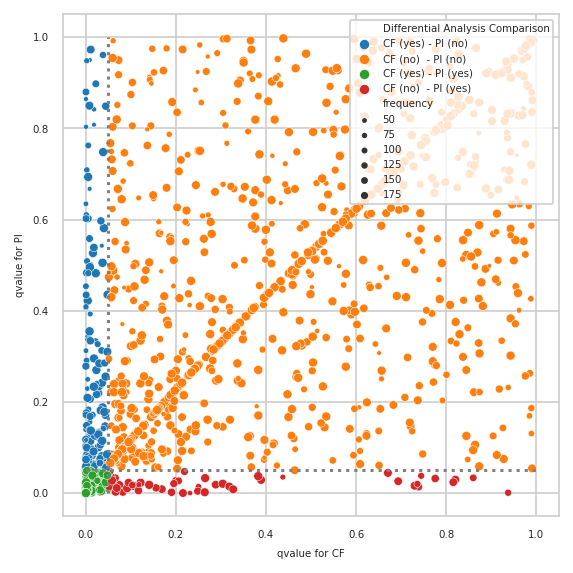

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
CLU,ENSP00000315130,4.263
...,...,...
HBS1L,ENSP00000356811,0.508
SMAD9,ENSP00000369154,0.506
ANKRD11,ENSP00000301030,0.506


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/usr/share/miniconda3/envs/vaep/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out